In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv("/content/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**Data Preprocessing**

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# 3) Find the duplicated rows

In [ ]:
duplicated_rows=df[df.duplicated()]
print(f"Duplicated rows present in a dataset: {duplicated_rows.shape[0]}")

Duplicated rows present in a dataset: 2


In [ ]:
# 4) Find the numeric columns

In [ ]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O' ]
print(num_feature)

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']


In [ ]:
# Find categorical Functions

In [ ]:
cat_feature=[feature for feature in df.columns if df[feature].dtype=='O' ]
print(cat_feature)

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


In [ ]:
# Exploratory Data Analysis (EDA)

box plot of numeric columns

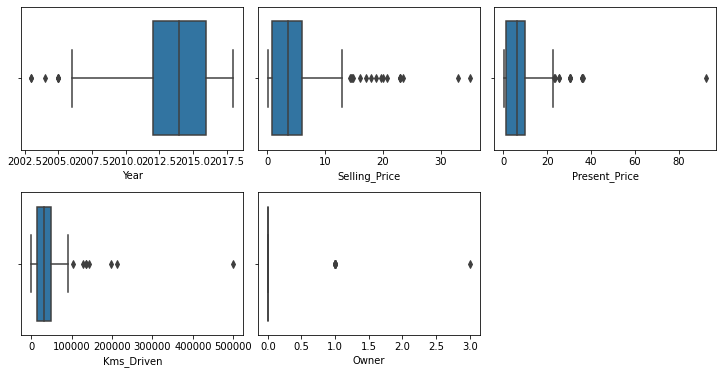

In [ ]:
fig=plt.figure(figsize=(10,10))

for i in range(len(num_feature)):
  plt.subplot(4,3,i+1)
  sns.boxplot(data=df,x=df[num_feature[i]])

plt.tight_layout()
plt.show()

In [ ]:
# There seem to be  some outliers in some numeric columns


In [ ]:
# 2) Kernel density estimation by Kdeplot of the numeric columns

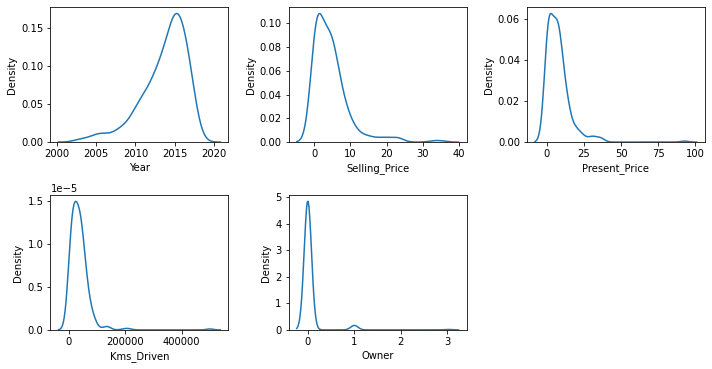

In [ ]:
fig=plt.figure(figsize=(10,10))
for i in range(len(num_feature)):
  plt.subplot(4,3,i+1)
  sns.kdeplot(data=df,x=df[num_feature[i]])

plt.tight_layout()
plt.show()

In [ ]:
# most of the numerical data are rightly sckewed

In [ ]:
#  Correlation between the numeric columns and 'Selling_Price'

**Correlation between the numeric columns and 'Selling_Price'**

In [ ]:
df1=df.corr()

In [ ]:
df1

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


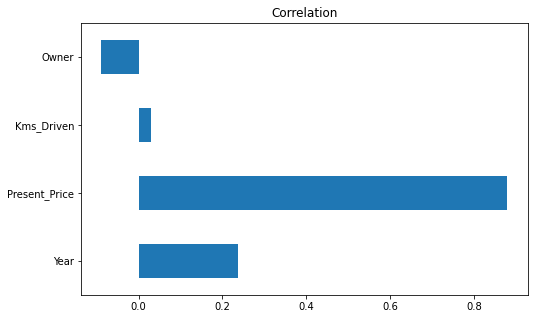

In [ ]:
plt.figure(figsize=(8,5))
X=df.drop('Selling_Price',axis=1)
X.corr(method='spearman')
X.corrwith(df['Selling_Price']).plot(kind='barh',title='Correlation')
plt.show()

In [ ]:
# heatmap

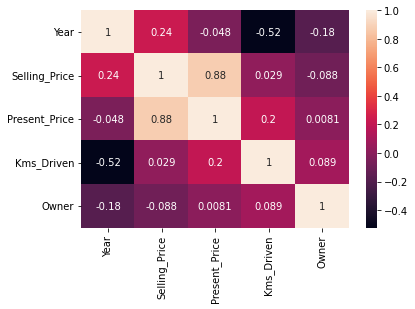

In [ ]:
df2=sns.heatmap(df.corr(),annot=True)

In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 91.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.7/764.7 KB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 KB 27.

DataPrep Report
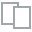
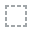
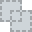
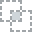
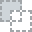
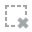
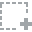
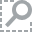
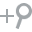
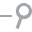
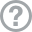
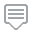
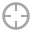
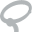
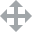
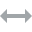
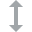
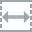
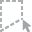
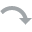
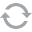
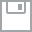
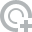
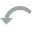
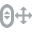
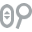
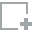
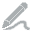
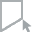
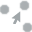
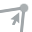
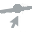

In [ ]:
import pandas as pd
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
df=pd.read_csv('car data.csv')

create_report(df)

In [ ]:
!pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 11.7 MB/s eta 0:00:00
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 3.0.0
    Uninstalling Jinja2-3.0.0:
      Successfully uninstalled Jinja2-3.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
distributed 2022.2.1 requires dask==2022.02.1, but you have dask 2023.2.0 which is incompatible.
dataprep 0.4.5 requires jinja2<3.1,>=3.0, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
import klib
import pandas as pd

In [ ]:
df = pd.read_csv('car data.csv')

In [ ]:
df.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1

GridSpec(6, 4)

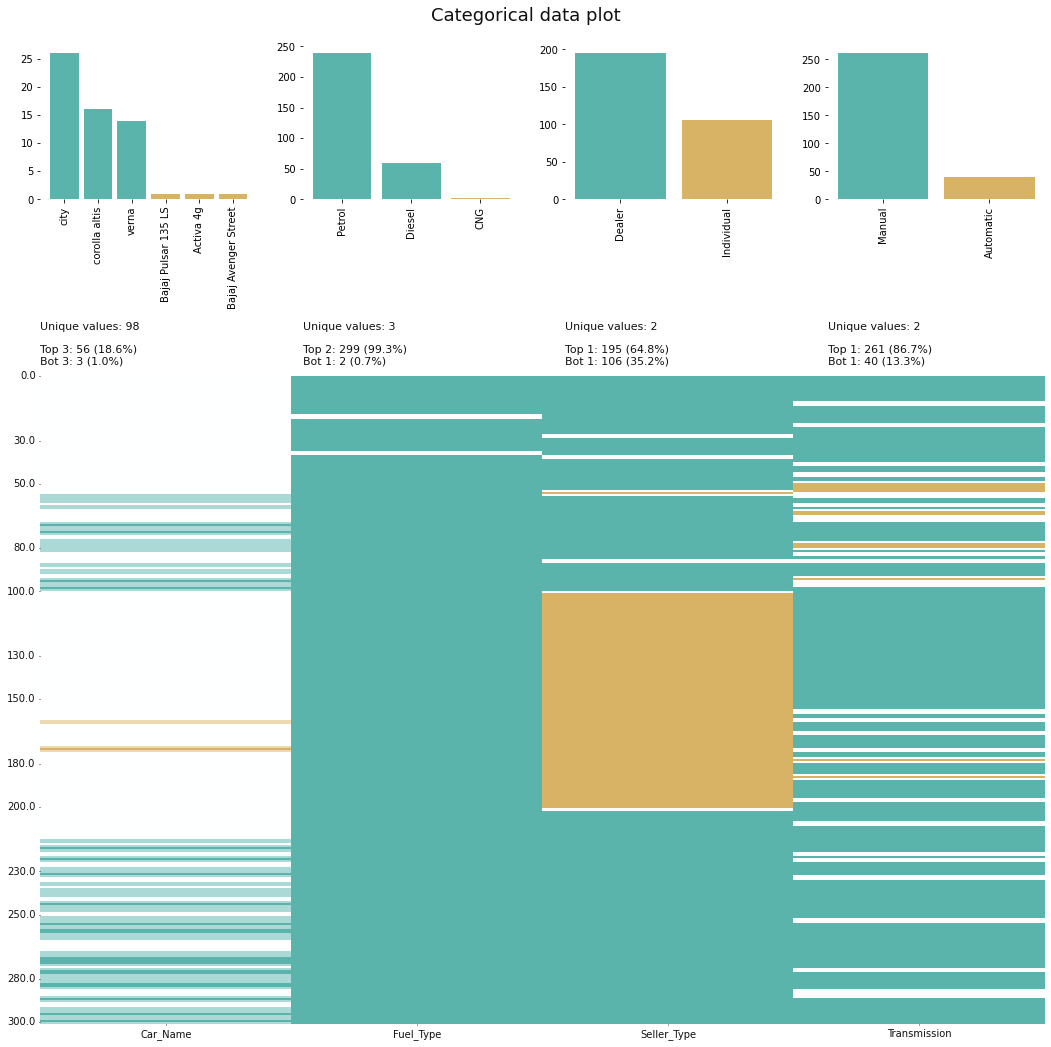

In [ ]:
klib.cat_plot(df)

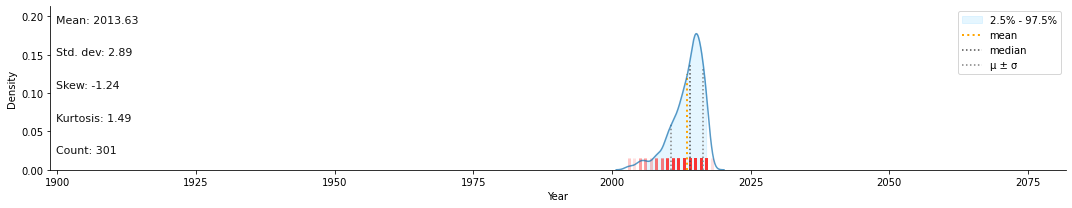

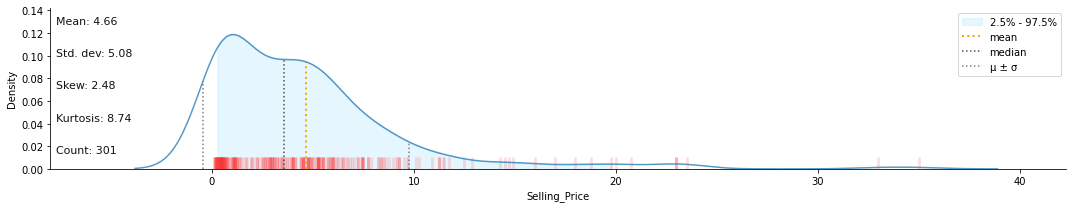

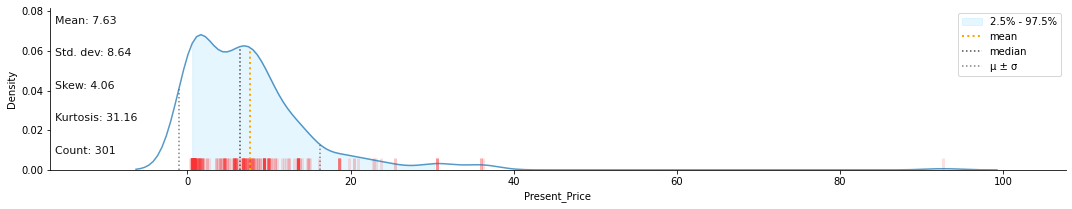

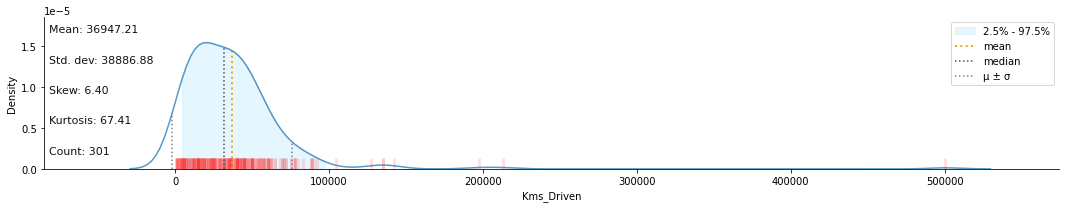

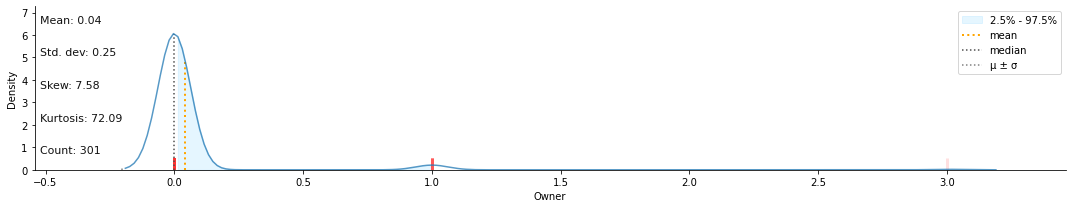

In [ ]:
klib.dist_plot(df)

In [ ]:
klib.convert_datatypes(df)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
klib.clean_column_names(df) # cleans and standardizes column names, also called inside data_cleaning()

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
klib.clean_column_names(df) # cleans and standardizes column names, also called inside data_cleaning()

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
klib.missingval_plot(df) # returns a figure containing information about missing values

No missing values found in the dataset.
